In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import numpy as np
import math
from shutil import copy
import imutils
from preprocessing_image import PreprocesingImage

2019-10-04 02:00:36,729 : DEBUG : Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

path = "../image/"

In [4]:
# image_path = path + 'cccd/DTN_CCCD_Shot2.jpg'
image_path = path + 'cccd/DTN_CCCD_Shot_Error_5.jpg'
# image_path = path + 'cccd/NDMT_CCCD.jpg'
# image_path = path + 'cccd/NDMT_CCCD_Error.jpg'
# image_path = path + 'cccd/NDMT_CCCD_Error_3.jpg'

2019-10-04 02:00:41,319 : INFO : Copy edges to the images that will display the results in BGR
2019-10-04 02:00:41,467 : DEBUG : findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2019-10-04 02:00:41,469 : DEBUG : findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2019-10-04 02:00:41,473 : DEBUG : findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2019-10-04 02:00:41,475 : DEBUG : findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2019-10-04 02:00:41,476 : DEBUG : findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2019-10-04 02:00:41,478 : DEBUG : findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2019-10-04 02:00:41,480 : DEBUG : findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique norm

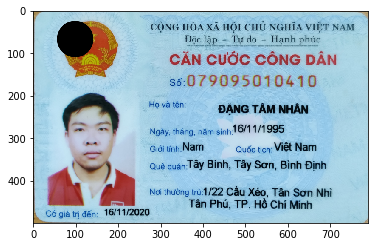

In [5]:
# corner_arr = np.asarray(pts_corner, dtype = "float32")
# warped_orig = four_point_transform(img_scale, corner_arr)
warped_image = PreprocesingImage.crop_card(image_path, 500)
warped_orig = PreprocesingImage.scale_image_with_image(warped_image, 500)
show_image(warped_orig)

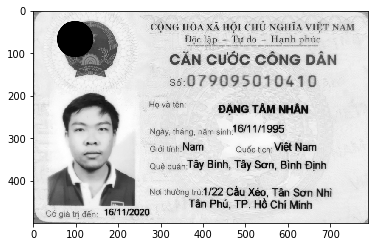

In [6]:
warped = cv2.cvtColor(warped_orig, cv2.COLOR_BGR2GRAY)
warped_color = cv2.cvtColor(warped_orig, cv2.COLOR_BGR2RGB)
show_image(warped)

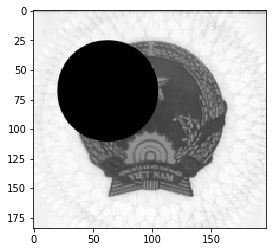

(184, 197)


In [7]:
bin_img = warped

ratio_y = 3.1/8.4
ratio_x1 = 0.25/5.4
ratio_x2 = 1.6/5.4


national_symbol = bin_img[:int(bin_img.shape[0]*ratio_y),
                          int(bin_img.shape[1]*ratio_x1):int(bin_img.shape[1]*ratio_x2)
                          ]

show_image(national_symbol)
print(national_symbol.shape)

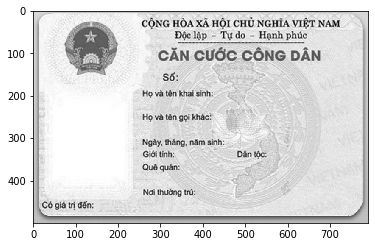

(500, 790)


In [10]:
# format_standard = cv2.imread(path + 'template_checking/standard_format_CCCd.jpg', cv2.IMREAD_GRAYSCALE)
format_standard = cv2.imread(path + 'template_checking/standard_format_CCCD_4.jpg', cv2.IMREAD_GRAYSCALE)
# format_standard_warped_image = PreprocesingImage.crop_card('template_checking/standard_format_CCCD_4.jpg', 500)
# format_standard = PreprocesingImage.scale_image_with_image(format_standard_raw, 500)
# cv2.imwrite(path + 'template_checking/standard_format_CCCD_4.jpg', format_standard)
show_image(format_standard)
print(format_standard.shape)

(array([], dtype=int64), array([], dtype=int64))
0


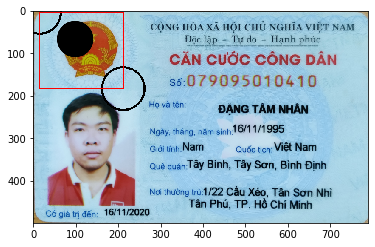

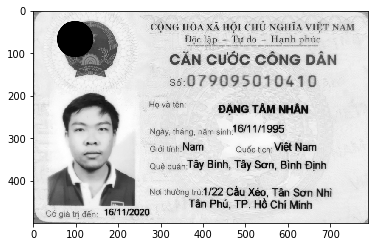

In [12]:
from matplotlib import pyplot as plt

w, h = national_symbol.shape[::-1]
res = cv2.matchTemplate(format_standard,national_symbol,cv2.TM_CCOEFF_NORMED)
# result = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= 0.83)
print(loc)
print(len(loc[0]))
if len(loc[0]) > 30:
#     for pt in zip(*loc[::-1]):
#         cv2.rectangle(format_standard, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)
#     show_image(format_standard)
    print(True)
else:
    result_image = warped_orig
    cv2.circle(result_image, (15, 5), 50, (0,0,0), 3)
    cv2.circle(result_image, (w+15, h), 50, (0,0,0), 3)
    cv2.rectangle(result_image, (15,5), (w+15, h), (255, 0, 0) , 2)
    show_image(result_image)
    show_image(warped)